In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
Lbox = 40  #size of the box
ref = np.array([3,5,23])   # reference coordinate (x0, y0 , z0)

In [52]:
Ntot = 1000

FAKE_DATA = Lbox * np.random.rand(Ntot, 3) 

In [53]:
FAKE_DATA

array([[ 4.02139763, 36.72212342, 30.02978042],
       [ 0.59435402, 38.75152025,  6.92523012],
       [23.9466521 ,  6.12732066,  8.43730308],
       ...,
       [38.421993  , 16.74819553,  7.01899869],
       [34.81932679, 31.56504283, 29.65626724],
       [ 4.48028632, 18.58182356,  3.99273795]])

# FIND THE DISTANCES OF ALL THE POINTS IN FAKE_DATA to ref

In [54]:
distance = np.sum((ref[None,:]-FAKE_DATA)**2  ,  axis = 1 )**0.5

# FIND THE NUMBER OF POINTS THAT ARE WITHIN [3,5] TO THE REFERENCE POINT

In [55]:
#print distance[3]

In [56]:
np.max(distance)

51.40807769229856

In [57]:
np.min(distance)

1.4364441125649527

In [58]:
A =(5 < distance) & ( distance < 15)

In [59]:
#print A

In [60]:
distance[A]

array([ 5.27435284,  9.89182181, 13.05489715, 12.96334917, 14.51566601,
       14.19302806,  9.33580833, 13.49508032, 12.69182687, 11.26807836,
        9.48058472, 14.09714018, 14.80976613,  8.13894656, 11.57609791,
       13.2152109 ,  5.7469427 , 13.62059227,  9.09467648, 12.9372697 ,
       14.23478115,  6.21444315,  7.96112533, 13.39739657, 10.95141003,
       14.95629828,  6.41706491, 11.25014697, 14.86458671,  8.93783071,
        9.50285755, 10.61061143, 14.06230342, 14.46963921, 14.22712952,
       13.80547173, 14.80556449, 14.95956618, 14.23499775, 14.09124486,
       13.09600931,  8.14929408, 14.20985618, 11.56490024, 10.18505706,
        6.30871229, 13.42452483, 12.98337397, 11.82144993, 10.30525612,
        9.63252129,  5.08336493,  6.56772944,  5.90639524, 12.00766843,
       12.75743216, 14.00223849, 13.54314296, 12.47034245, 14.74271297,
        9.55047127,  9.32299633, 13.5294708 , 10.56386846, 14.4523052 ,
       13.63037496, 13.73025653,  7.05698066,  8.89950942, 13.83

In [61]:
len(distance[A])

85

# FIND THE AVERAGE NUMBER OF POINTS THAT ARE WITHIN [3,5] FROM OTHER POINTS

In [62]:
zebra = []

for point in FAKE_DATA:
    
    distance_to_point = np.sum((point[None,:]-FAKE_DATA)**2  ,  axis = 1 )**0.5 #distance from all the points in fake data to the point
    A = (5 < distance_to_point) & ( distance_to_point < 15)
    x = len(distance_to_point[A])
    zebra.append(x)

In [63]:
zebra  = np.array(zebra)

In [64]:
#zebra

WHAT IS IN ZEBRA? [59, 111, ...]

That means there are 59 points between 5 and 15 Mpcs away from the first point, and there 111 points between 5 and 15 
Mpcs away from the second point, ... 

In [65]:
np.mean(zebra) # this is the average number of points that are between 5 and 15 Mpcs away from other points in our data

137.51

# introduction to lists

In [66]:
l = []
l.append(1)
print l

[1]


In [67]:
l.append(2)

In [68]:
l.append(-10)

In [69]:
l

[1, 2, -10]

In [70]:
np.array(l)

array([  1,   2, -10])

In [71]:
tugba = np.array([1,2])
sinem = [1,2]

In [72]:
sinem.append(3)

In [73]:
print sinem

[1, 2, 3]


In [74]:
#for [3,5] defination function (a,b):  and return average  a-min. b-max.


def func(amin,bmax):
    
    """this function returns average number of 
    all galaxies between [a,b] to other galaxies """
    
    zebra = []

    for point in FAKE_DATA:
    
        distance_to_point = np.sum((point[None,:]-FAKE_DATA)**2  ,  axis = 1 )**0.5 #distance from all the points in fake data to the point
        A = (amin < distance_to_point) & ( distance_to_point < bmax)
        x = len(distance_to_point[A])
        zebra.append(x)
    zebra= np.array(zebra)
        
    return np.average(zebra)


In [75]:
func(2,4) #if you write (amin,bmax) it gives you 

3.312

In [76]:
def func2():
    """it returns func(2,4) and func(4,6) -- 
    sonunda [2,4] için olan sonuç değeri vericek bize."""
    listnew = []
    lister = [2,4,6,8,10,12]
    for i in lister:
        listnew.append(func(i,i+2))
    return listnew

In [77]:
func2() 

[3.312, 8.032, 15.112, 23.102, 31.32, 39.77]

In [78]:
def f(x):
    a = x**2 
    return a

# now we want to find the average number of fake date to galaxies around fake date one galaxies . So we need two fake data.

In [79]:
Lbox1 =  40 #size of the box
Ntot1 = 1000
Ntot2 = 1500

FAKE_DATA1 = Lbox1 *np.random.rand(Ntot1,3)
FAKE_DATA2 = Lbox1 *np.random.rand(Ntot2,3)

In [80]:
FAKE_DATA1

array([[ 6.14667997, 24.88131308, 16.27656953],
       [15.87783703,  3.77039051,  8.59810152],
       [32.92643244, 35.4162751 , 32.5527502 ],
       ...,
       [25.96818868, 27.21590428,  4.22333995],
       [20.34765943, 33.45588353, 32.01855999],
       [31.27232849, 14.43305188,  4.69602115]])

In [81]:
FAKE_DATA2

array([[31.96121132,  2.04957689, 34.51230118],
       [32.40770728, 21.2428099 , 31.1518779 ],
       [17.39808397,  3.50830001, 37.79413781],
       ...,
       [ 0.42658904, 27.25003198, 12.82593859],
       [22.3646922 , 11.97579981, 26.00131287],
       [31.17375659,  3.34132059,  6.71602843]])

In [82]:
#for [3,5] defination function (a,b):  and return average  a-min. b-max.


def func(amin,bmax,data1,data2):
    
    """this function returns average number of 
    data1 points and data2 points between amin and bmax"""
    
    zebra = []

    for point in data1:
    
        distance_to_point = np.sum((point[None,:]-data2)**2  ,  axis = 1 )**0.5 #distance from all the points in fake data to the point
        A = (amin < distance_to_point) & ( distance_to_point < bmax)
        x = len(distance_to_point[A])
        zebra.append(x)
    zebra= np.array(zebra)
        
    return np.average(zebra)


In [92]:
func(5,20,FAKE_DATA1,FAKE_DATA2) 
"""the average number of data one points(FAKE_DATA1) around 
data two point(FAKE_DATA2) between 5and20"""

'the average number of data one points(FAKE_DATA1) around \ndata two point(FAKE_DATA2) between 5and20'

In [90]:
def func2():
    """
    func(data1,data2,FAKE_DATA1,FAKE_DATA2) -- 
    sonunda [data1,data2,FAKE_DATA1,FAKE_DATE2] için olan net sonuçu değeri vericek bize."""
    listnew = []
    lister = [2,4,6,8,10,12]
    for i in lister:
        listnew.append(func(i,i+2,FAKE_DATA1,FAKE_DATA2))
    return listnew

In [91]:
func2()

[5.115, 12.375, 22.294, 33.471, 45.77, 58.246]

# make plot func2() and put in the overleaf 

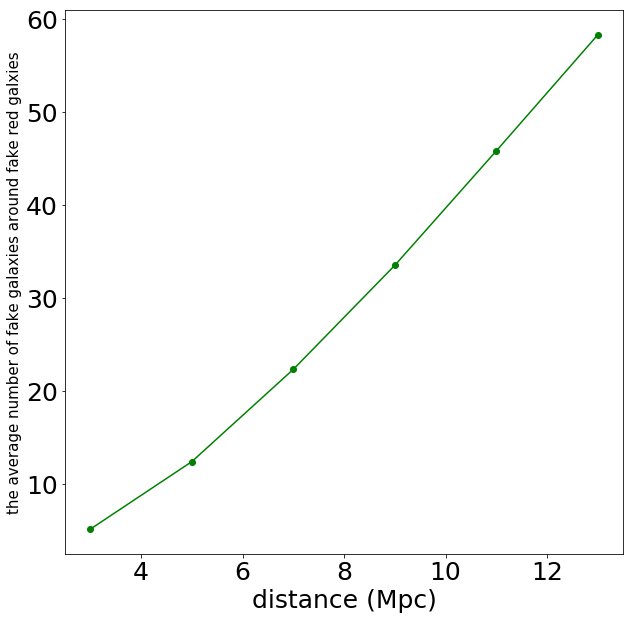

In [100]:
plt.figure(figsize=(10,10))

#x = [2,4,6,8,10,12,14]
x = [3,5,7,9,11,13]
y = func2()
plt.plot(x,y, marker = "o", color ="g")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel("the average number of fake galaxies around fake red galxies",fontsize=15)
plt.xlabel("distance (Mpc)",fontsize=25)
plt.savefig("figure1.pdf")

In [101]:
"12"+"q"

'12q'

In [103]:
a = 2
str(a)+"q"

'2q'